<a href="https://colab.research.google.com/github/TrybusRafalJan/f-AnoGAN/blob/master/ZZSN-typeA-whole-ag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# f-AnoGAN

Moje notatniki:

https://colab.research.google.com/drive/17PXaYKr_frIs57JT_VUlddHashpEYzpg (single-class)

https://colab.research.google.com/drive/1KPnsRFK37xw1aZlc2f2f-sa3tEXdWjYS (multi-class)

https://colab.research.google.com/drive/1qA0xWtmJdqfv0aDycTb0TDvYLQwWJAHs#scrollTo=6Y32B2dT6ShV (multi-class)(automated)

https://colab.research.google.com/drive/1L0MMlkvbe56tQFo4Nr2y552ua8LP1yc7 (inferencja)

(ASO)[Syjamskie]

https://colab.research.google.com/drive/1Afl1SvZwzKv7ntaJ1bxXF7KlPjU12D31


**Na podstawie poniższych źródeł:**


*   https://www.sciencedirect.com/science/article/abs/pii/S1361841518302640
*   https://github.com/tSchlegl/f-AnoGAN

*   https://github.com/eriklindernoren/PyTorch-GAN/blob/master/implementations/wgan_gp/wgan_gp.py
*   https://github.com/eriklindernoren/PyTorch-GAN/blob/master/implementations/dcgan/dcgan.py

*   https://github.com/A03ki/f-AnoGAN











#I. Wstęp

## I.I Zasada działania
Rozwiązanie opiera się na dwóch blokach: ***Sieci GAN*** (Generator + Dyskryminator) oraz głębokiego enkodera ***(Deep Encoder)***

### A. GAN
Sama sieć GAN trenowana jest na próbkach bez anomalii - klasa OK.

- **Generator** trenowany jest do przekształcania losowego wektora wejściowego - mogącego być utożsamianym z losowym zdjęciem w przestrzeni ukrytej ***(latent space)*** - do zdjęcia reprezentującego klasę obiektu bez anomali. Na podstawie "feedbacku" od dyskryminatora.

- **Dyskryminator** porównuje i ocenia zdjęcie treningowe (prawdziwe zdjęcie bez anomalii) ze zdjęciem wygenerowanym przez generator.


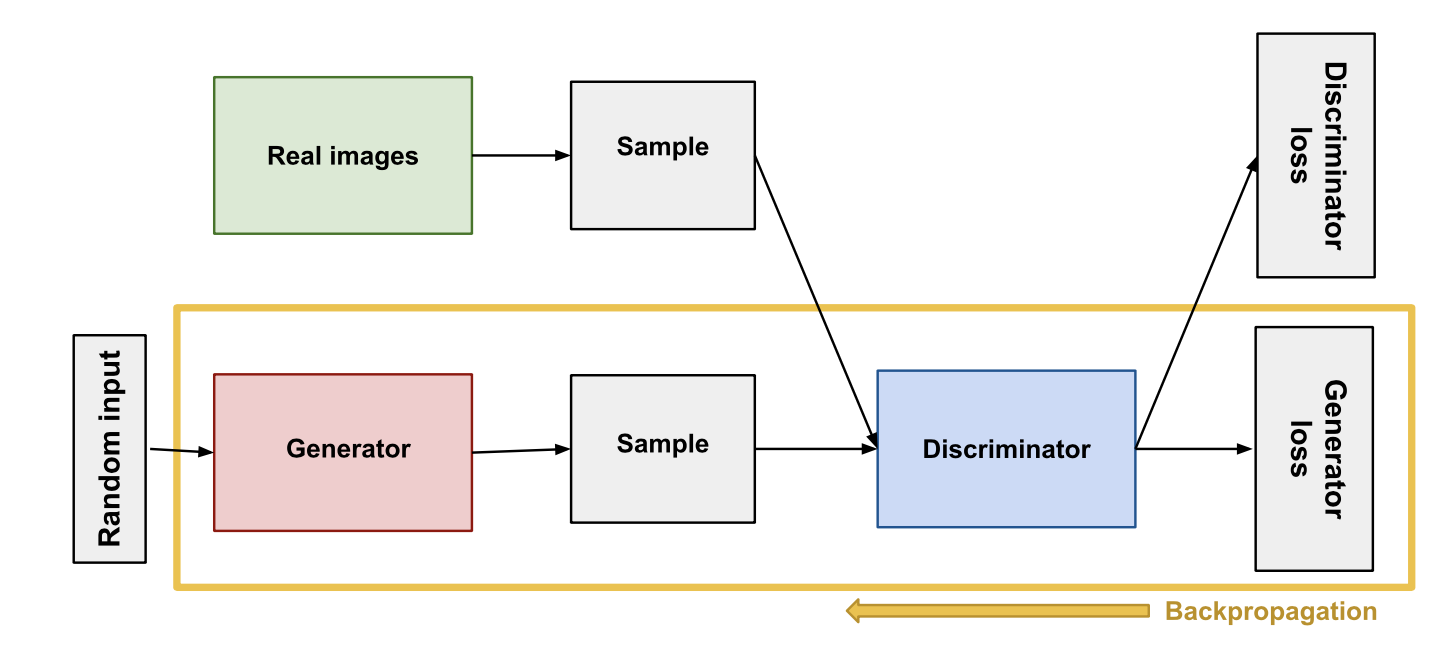

**Różnica między klasycznym GAN'em a zastosowanym tutaj WGAN'em znajduje się w dyskryminatorze i jest następująca:**

Zamiast wykorzystania dyskryminatora do klasyfikacji lub predykcji prawdopodobieństwa wygenererowane zdjęcia jako 'real' lub 'fake' stosowana jest miara prawdziwości badanego zdjęcia.

### B. Deep Encoder

Aby możliwa była detekcja anomalii (wskazanie ich) na zdjęciach wyjściowych, rozwiązanie oprócz sieci GAN wykorzystuje doatkowy encoder - mapujący zdjęcia do przestrzeni ukrytej (latent space). 

Trening encodera może przebiegać w trzech różnych reżimach:
- *image-z-image (izi) 
- z-image-z(ziz) 
- izi_f

^^gdzie ***'z'*** oznacza przestrzeń ukrytą a ***'image'*** przestrzeń zdjęcia



**1.**   ***image-z-image***


Ta architkeruta zakłada wytępujący po sobie układ ***ENCODER -> DECODER***(nasz generator z GAN'a). Trening **tylko na zdjęciach prawdziwych**.

Trening polega na tym, że na wejście enkodera dajemy 'prawdziwe' zdjęcie treningowe. Na jego wyjściu uzyskujemy reprezentację zdjęcia w przestrzeni ukrytej. Wyjście encodera od razu przepuszczamy przez wytrenowaną część generatora (dekoder) i ponownie otrzymujemy zdjęcie. Porównujemy tak otrzymane zdjęcie ze zdjęciem 'prawdziwym' i obliczamy **MSE**.

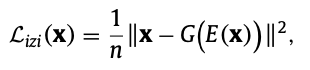


Schemat:

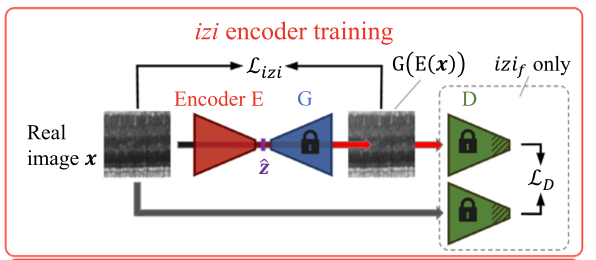





**2.**   ***z-image-z***

Trening polega na tym, że podczas treningu GAN'a podbieramy w losowych odstępach czasu tensor przestrzeni ukrytej. Wykorzystujemy dekoder (generator) do przetransformowania go do przestrzeni zdjęcia. Zdjęcie to jest wejściem do enkodera, który próbuje przekształcić go z powrotem do przestrzeni ukrytej.
Liczymy **MSE** między tensorem 'prawdziwym' (wejściem generatora) a tensorem otrzymanym na wyjściu enkodera.


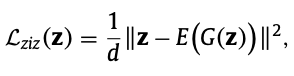



Schemat:


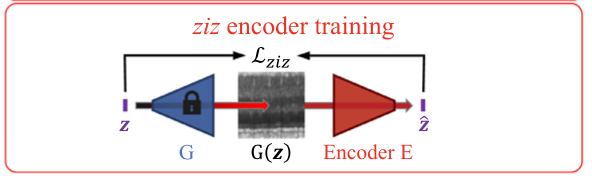



**3.** izif (wykorzystane w kodzie)


Połączenie tych dwóch. Krtyrium jest MSE zarówno w przetrzeni ukrytej jak i przestrzeni zdjęcia. TODO




### 0. Konfiguracja środowiska

In [1]:
!pip install torchvision==0.8.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 4.3 MB/s 
     |████████████████████████████████| 776.8 MB 18 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0+cu113
    Uninstalling torch-1.11.0+cu113:
      Successfully uninstalled torch-1.11.0+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.12.0+cu113
    Uninstalling torchvision-0.12.0+cu113:
      Successfully uninstalled torchvision-0.12.0+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.12.0 requires torch==1.11.0, but you have torch 1.7.1 which is incompatible.
torchaudio 0.11.0+cu113 requires torch==1.11.0, but you have torch 1.7.1 which is incompatible.


***cd...***

In [2]:
#repo forked from a03ki for all requirements
!git clone https://github.com/TrybusRafalJan/f-AnoGAN.git

Cloning into 'f-AnoGAN'...
remote: Enumerating objects: 214, done.
remote: Total 214 (delta 0), reused 0 (delta 0), pack-reused 214
Receiving objects: 100% (214/214), 14.03 MiB | 12.22 MiB/s, done.
Resolving deltas: 100% (112/112), done.


In [3]:
%cd f-AnoGAN

/content/f-AnoGAN


In [4]:
!python setup.py install

running install
running bdist_egg
running egg_info
creating fanogan.egg-info
writing fanogan.egg-info/PKG-INFO
writing dependency_links to fanogan.egg-info/dependency_links.txt
writing requirements to fanogan.egg-info/requires.txt
writing top-level names to fanogan.egg-info/top_level.txt
writing manifest file 'fanogan.egg-info/SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'fanogan.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/fanogan
copying fanogan/train_encoder_izif.py -> build/lib/fanogan
copying fanogan/__init__.py -> build/lib/fanogan
copying fanogan/train_wgangp.py -> build/lib/fanogan
copying fanogan/save_compared_images.py -> build/lib/fanogan
copying fanogan/test_anomaly_detection.py -> build/lib/fanogan
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/fanogan
copying build/lib/

**Import danych z Kaggle**

In [5]:
import os
os.environ['KAGGLE_USERNAME'] = 'twmprojekt'
os.environ['KAGGLE_KEY'] = '7cbe815cea0bf6c29fbff1cac69cba0c'

In [6]:
%%bash
mkdir /content/dataset
cd /content/dataset
kaggle datasets download -d twmprojekt/printedcircutboard --unzip 

100%|██████████| 691M/691M [00:20<00:00, 35.1MB/s]


### 2.PODLINKOWANIE ODPOWIEDNIEGO ZBIORU DANYCH


Należy podać ścieżkę lokalizacji zbioru danych, ilość sekcji oraz PATH dla każdej zostanie wygenerowany automatycznie

In [7]:
data_location = "../dataset/GAN_typeA_whole-ag/GAN_typeA_whole-ag/"
#data_location = "../dataset/GAN_typeC_right_whole-ag/GAN_typeC_right_whole-ag/"


In [8]:
classes_directories = next(os.walk(data_location))[1]

nr_of_sections = len(classes_directories)

classes_directories.sort()
print(classes_directories)
print("\n Identified: ",nr_of_sections, "sections(classes) \n")

train_data_paths = []
test_data_paths = []

for i in range(len(classes_directories)):
  

  train_path = data_location + "section" + str(i+1) + "/train"
  train_data_paths.append(train_path)

  test_path = data_location + "section" + str(i+1) + "/test"
  test_data_paths.append(test_path)
  

print("\n :::TRAIN DATA PATHS:::")
print(train_data_paths)

print("\n :::TEST DATA PATHS:::")
print(test_data_paths)

  
  


['section1']

 Identified:  1 sections(classes) 


 :::TRAIN DATA PATHS:::
['../dataset/GAN_typeA_whole-ag/GAN_typeA_whole-ag/section1/train']

 :::TEST DATA PATHS:::
['../dataset/GAN_typeA_whole-ag/GAN_typeA_whole-ag/section1/test']


### 3. WGAN

**3.1 Funkcje trenujące** WGAN-GP (Wasserstein Distance)(Gradient Penalty)

https://towardsdatascience.com/demystified-wasserstein-gan-with-gradient-penalty-ba5e9b905ead

Algorytm będzie opierał się na próbie zbliżenia dystrybucji generowanych zdjęć (P_g) do dystrybucji prawdziwych zdjęć (P_r) [rys]

Minimalizujemy ten dystans (Wasserstein Distance)

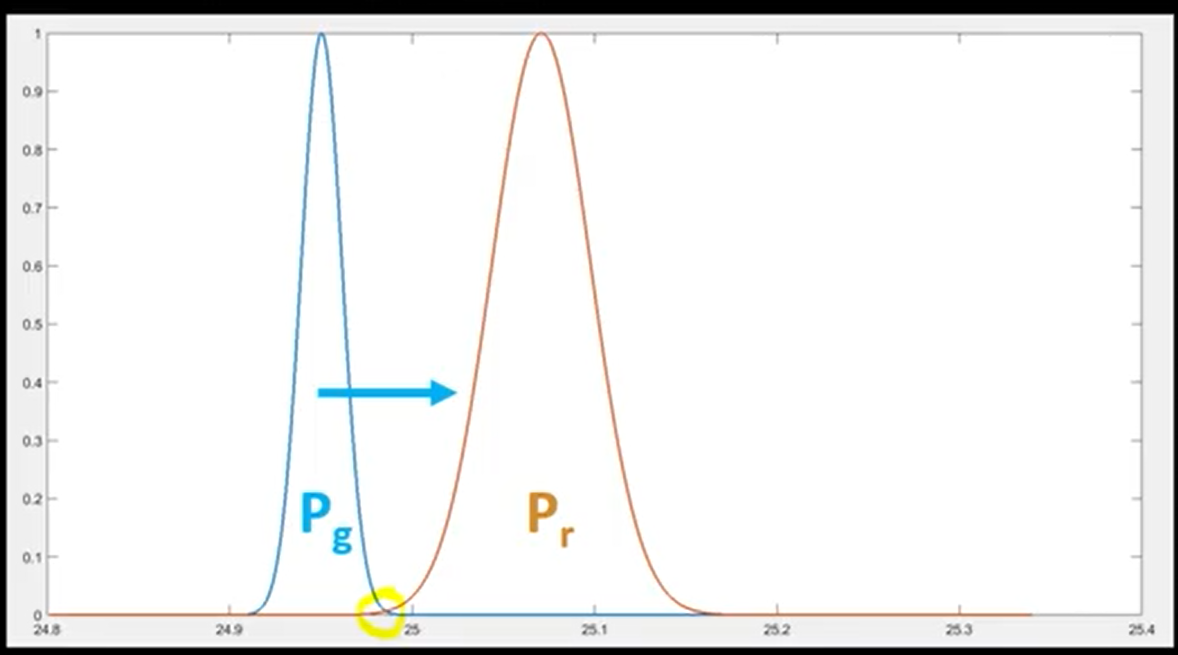

Ograniczenie na dyskryminator realizuja taka funkcja: [rys]


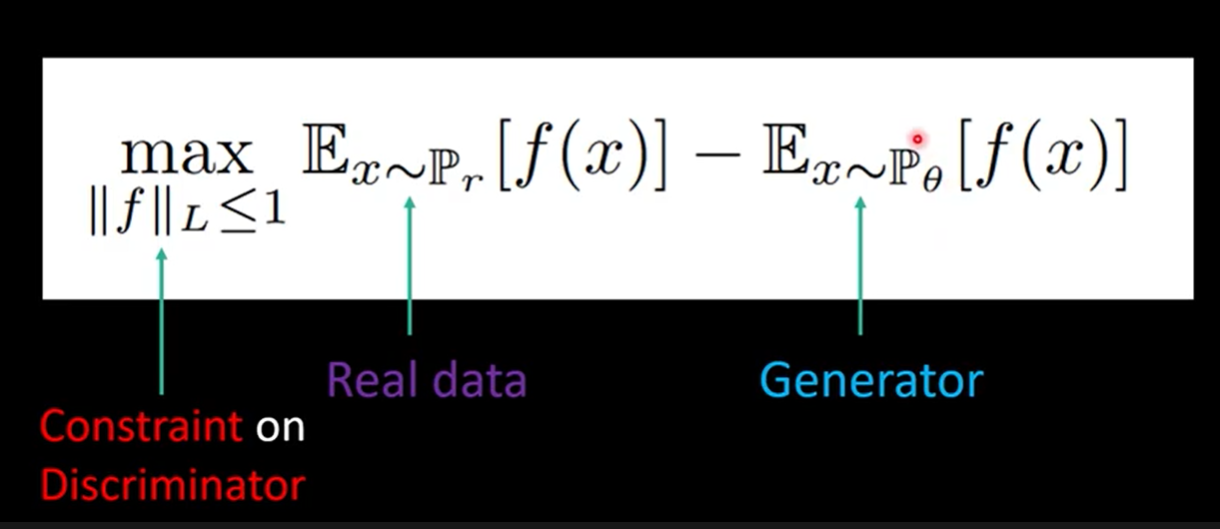

^^ Generator próbuję zbliżyć do siebie P_g i P_r, dyskryminator oddalić


**Funkcje odpowiadające za trening duetu generator , dyskryminator**

In [9]:
import os
import torch
import torch.autograd as autograd
from torchvision.utils import save_image


def compute_gradient_penalty(D, real_samples, fake_samples, device):
    """Calculates the gradient penalty loss for WGAN GP"""
    # Random weight term for interpolation between real and fake samples
    alpha = torch.rand(*real_samples.shape[:2], 1, 1, device=device)
    # Get random interpolation between real and fake samples
    interpolates = (alpha * real_samples + (1 - alpha) * fake_samples)
    interpolates = autograd.Variable(interpolates, requires_grad=True)
    d_interpolates = D(interpolates)
    fake = torch.ones(*d_interpolates.shape, device=device)
    # Get gradient w.r.t. interpolates
    gradients = autograd.grad(outputs=d_interpolates, inputs=interpolates,
                              grad_outputs=fake, create_graph=True,
                              retain_graph=True, only_inputs=True)[0]
    gradients = gradients.view(gradients.shape[0], -1)
    gradient_penalty = ((gradients.norm(2, dim=1) - 1) ** 2).mean()
    return gradient_penalty


def train_wgangp(opt, generator, discriminator,dataloader, device, lambda_gp=10,section="none"):
    generator.to(device)
    discriminator.to(device)

    #GENERATOR
    optimizer_G = torch.optim.Adam(generator.parameters(),
                                   lr=opt.lr, betas=(opt.b1, opt.b2))
    #DYSKRIMINATOR
    optimizer_D = torch.optim.Adam(discriminator.parameters(),
                                   lr=opt.lr, betas=(opt.b1, opt.b2))
    k = section
    os.makedirs(f"results/{section}/images", exist_ok=True)

    padding_epoch = len(str(opt.n_epochs))
    padding_i = len(str(len(dataloader)))

    batches_done = 0
    for epoch in range(opt.n_epochs):
        for i, (imgs, _)in enumerate(dataloader):

            # Configure input
            real_imgs = imgs.to(device)

            # ---------------------
            #  Train Discriminator
            # ---------------------

            optimizer_D.zero_grad()

            # Sample noise as generator input
            z = torch.randn(imgs.shape[0], opt.latent_dim, device=device)

            # Generate a batch of images
            fake_imgs = generator(z)

            # Real images
            real_validity = discriminator(real_imgs)
            # Fake images
            fake_validity = discriminator(fake_imgs.detach())
            # Gradient penalty
            gradient_penalty = compute_gradient_penalty(discriminator,
                                                        real_imgs.data,
                                                        fake_imgs.data,
                                                        device)
            # Adversarial loss
            d_loss = (-torch.mean(real_validity) + torch.mean(fake_validity)
                      + lambda_gp * gradient_penalty)

            d_loss.backward()
            optimizer_D.step()

            optimizer_G.zero_grad()

            # Train the generator and output log every n_critic steps
            if i % opt.n_critic == 0:

                # -----------------
                #  Train Generator
                # -----------------

                # Generate a batch of images
                fake_imgs = generator(z)
                # Loss measures generator's ability to fool the discriminator
                # Train on fake images
                fake_validity = discriminator(fake_imgs)
                g_loss = -torch.mean(fake_validity)

                g_loss.backward()
                optimizer_G.step()

                print(f"[Section {section} ]"
                      f"[Epoch {epoch:{padding_epoch}}/{opt.n_epochs}] "
                      f"[Batch {i:{padding_i}}/{len(dataloader)}] "
                      f"[D loss: {d_loss.item():3f}] "
                      f"[G loss: {g_loss.item():3f}]")

                if batches_done % opt.sample_interval == 0:
                    save_image(fake_imgs.data[:25],
                               f"results/{section}/images/{batches_done:06}.png",
                               nrow=5, normalize=True)

                batches_done += opt.n_critic

    torch.save(generator.state_dict(), f"results/{section}/generator")
    torch.save(discriminator.state_dict(), f"results/{section}/discriminator")


**Prosta struktura do przetrzymywania parametrów uczenia**

In [10]:
class Namespace:
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)

**Parametry uczenia WGAN'a**

In [11]:
opt = Namespace(b1=0.5,
                b2=0.999,
                batch_size=32,
                channels=3,
                dataset_name='bottle',
                force_download=False,
                img_size=64,
                latent_dim=100,
                lr=0.0002,
                n_critic=5,
                n_epochs=1500,
                #n_epochs=3, #debug
                sample_interval=400,
                seed=1)

**3.2. Generator i dyskryminator**

In [12]:
import torch.nn as nn


class Generator(nn.Module):
    def __init__(self, opt):
        super().__init__()

        self.init_size = opt.img_size // 4
        self.l1 = nn.Sequential(nn.Linear(opt.latent_dim,
                                128 * self.init_size ** 2))

        self.conv_blocks = nn.Sequential(
            nn.BatchNorm2d(128),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 128, 3, stride=1, padding=1),
            nn.BatchNorm2d(128, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 64, 3, stride=1, padding=1),
            nn.BatchNorm2d(64, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, opt.channels, 3, stride=1, padding=1),
            nn.Tanh(),
        )

    def forward(self, z):
        out = self.l1(z)
        out = out.view(out.shape[0], 128, self.init_size, self.init_size)
        img = self.conv_blocks(out)
        return img


class Discriminator(nn.Module):
    def __init__(self, opt):
        super().__init__()

        def discriminator_block(in_filters, out_filters, bn=True):
            block = [nn.Conv2d(in_filters, out_filters, 3, 2, 1),
                     nn.LeakyReLU(0.2, inplace=True), nn.Dropout2d(0.25)]
            if bn:
                block.append(nn.BatchNorm2d(out_filters, 0.8))
            return block

        self.model = nn.Sequential(
            *discriminator_block(opt.channels, 16, bn=False),
            *discriminator_block(16, 32),
            *discriminator_block(32, 64),
            *discriminator_block(64, 128),
        )

        # The height and width of downsampled image
        ds_size = opt.img_size // 2 ** 4
        self.adv_layer = nn.Sequential(nn.Linear(128 * ds_size ** 2, 1))

    def forward(self, img):
        features = self.forward_features(img)
        validity = self.adv_layer(features)
        return validity

    def forward_features(self, img):
        features = self.model(img)
        features = features.view(features.shape[0], -1)
        return features


class Encoder(nn.Module):
    def __init__(self, opt):
        super().__init__()

        def encoder_block(in_filters, out_filters, bn=True):
            block = [nn.Conv2d(in_filters, out_filters, 3, 2, 1),
                     nn.LeakyReLU(0.2, inplace=True), nn.Dropout2d(0.25)]
            if bn:
                block.append(nn.BatchNorm2d(out_filters, 0.8))
            return block

        self.model = nn.Sequential(
            *encoder_block(opt.channels, 16, bn=False),
            *encoder_block(16, 32),
            *encoder_block(32, 64),
            *encoder_block(64, 128),
        )

        # The height and width of downsampled image
        ds_size = opt.img_size // 2 ** 4
        self.adv_layer = nn.Sequential(nn.Linear(128 * ds_size ** 2,
                                                 opt.latent_dim),
                                       nn.Tanh())

    def forward(self, img):
        features = self.model(img)
        features = features.view(features.shape[0], -1)
        validity = self.adv_layer(features)
        return validity


Pomocnicza funkcja aplikująca zadane transformacje (data agumentation) na zbiorze zdjęć

In [13]:
from torchvision.transforms.transforms import GaussianBlur
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import os


from torchvision import datasets, transforms

def agumentData(data_path,mode):

  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

  if mode == 1:
    transform = transforms.Compose([transforms.Resize([opt.img_size]*2),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.5, 0.5, 0.5],
                                                          [0.5, 0.5, 0.5])])
  elif mode == 2:
      transform = transforms.Compose([transforms.Resize([opt.img_size]*2),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.GaussianBlur(kernel_size=(3, 5), sigma=(0.1, 1)), #
                                      transforms.ColorJitter(brightness=0.3,contrast=0.2,saturation=0.2,hue=0), #
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.5, 0.5, 0.5],
                                                          [0.5, 0.5, 0.5])])

  
  train_dataset = datasets.ImageFolder(data_path, transform=transform)
  print(np.shape(train_dataset))
  nr_of_images = np.shape(train_dataset)[0]
  train_data = torch.utils.data.DataLoader(train_dataset,nr_of_images,True)



  return train_data

Pomocnicza funkcja wyświetlająca zdjęcia (zapisane w obiekcie typu DataLoader) po agumentacji (operacja transform) w postaci siatki:

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import PIL

def imshow(dataLoaderImages,rows,cols):

  

    dataiter = iter(dataLoaderImages)
    images, labels = dataiter.next()

    images_qty = np.shape(images)
    print("The training data overview: ")
    print("Number of images",images_qty[0])
    print("-------OVERVIEW--------")

    if(rows*cols < images_qty[0]):
      print("The total images QTY is",images_qty[0], " The grid you have selected: ",rows,"x",cols,"=",rows*cols, " is not sufficient. Please specify new ones in the cell above")
    else:

      i = 0
    
      _, axs = plt.subplots(rows, cols, figsize=(80, 80))
      plt.subplots_adjust(top = 0.59, bottom=0.1, hspace=0.1, wspace=0.1)
      axs = axs.flatten()
    
    

      for x in range(images_qty[0]):
        images[i] = images[i] / 2 + 0.5     # unnormalize
        npimg = images.numpy()
        axs[i].imshow(np.transpose(images[i].numpy(), (1, 2, 0)))
        i = i+1
      plt.show()

Agumentacja i inspekcja zdjęć trenujących

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  result = asarray(a).shape
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(70, 2)

 Images display grid:  [10, 7] 

SECTION [ 1 / 1 ] 

The training data overview: 
Number of images 70
-------OVERVIEW--------


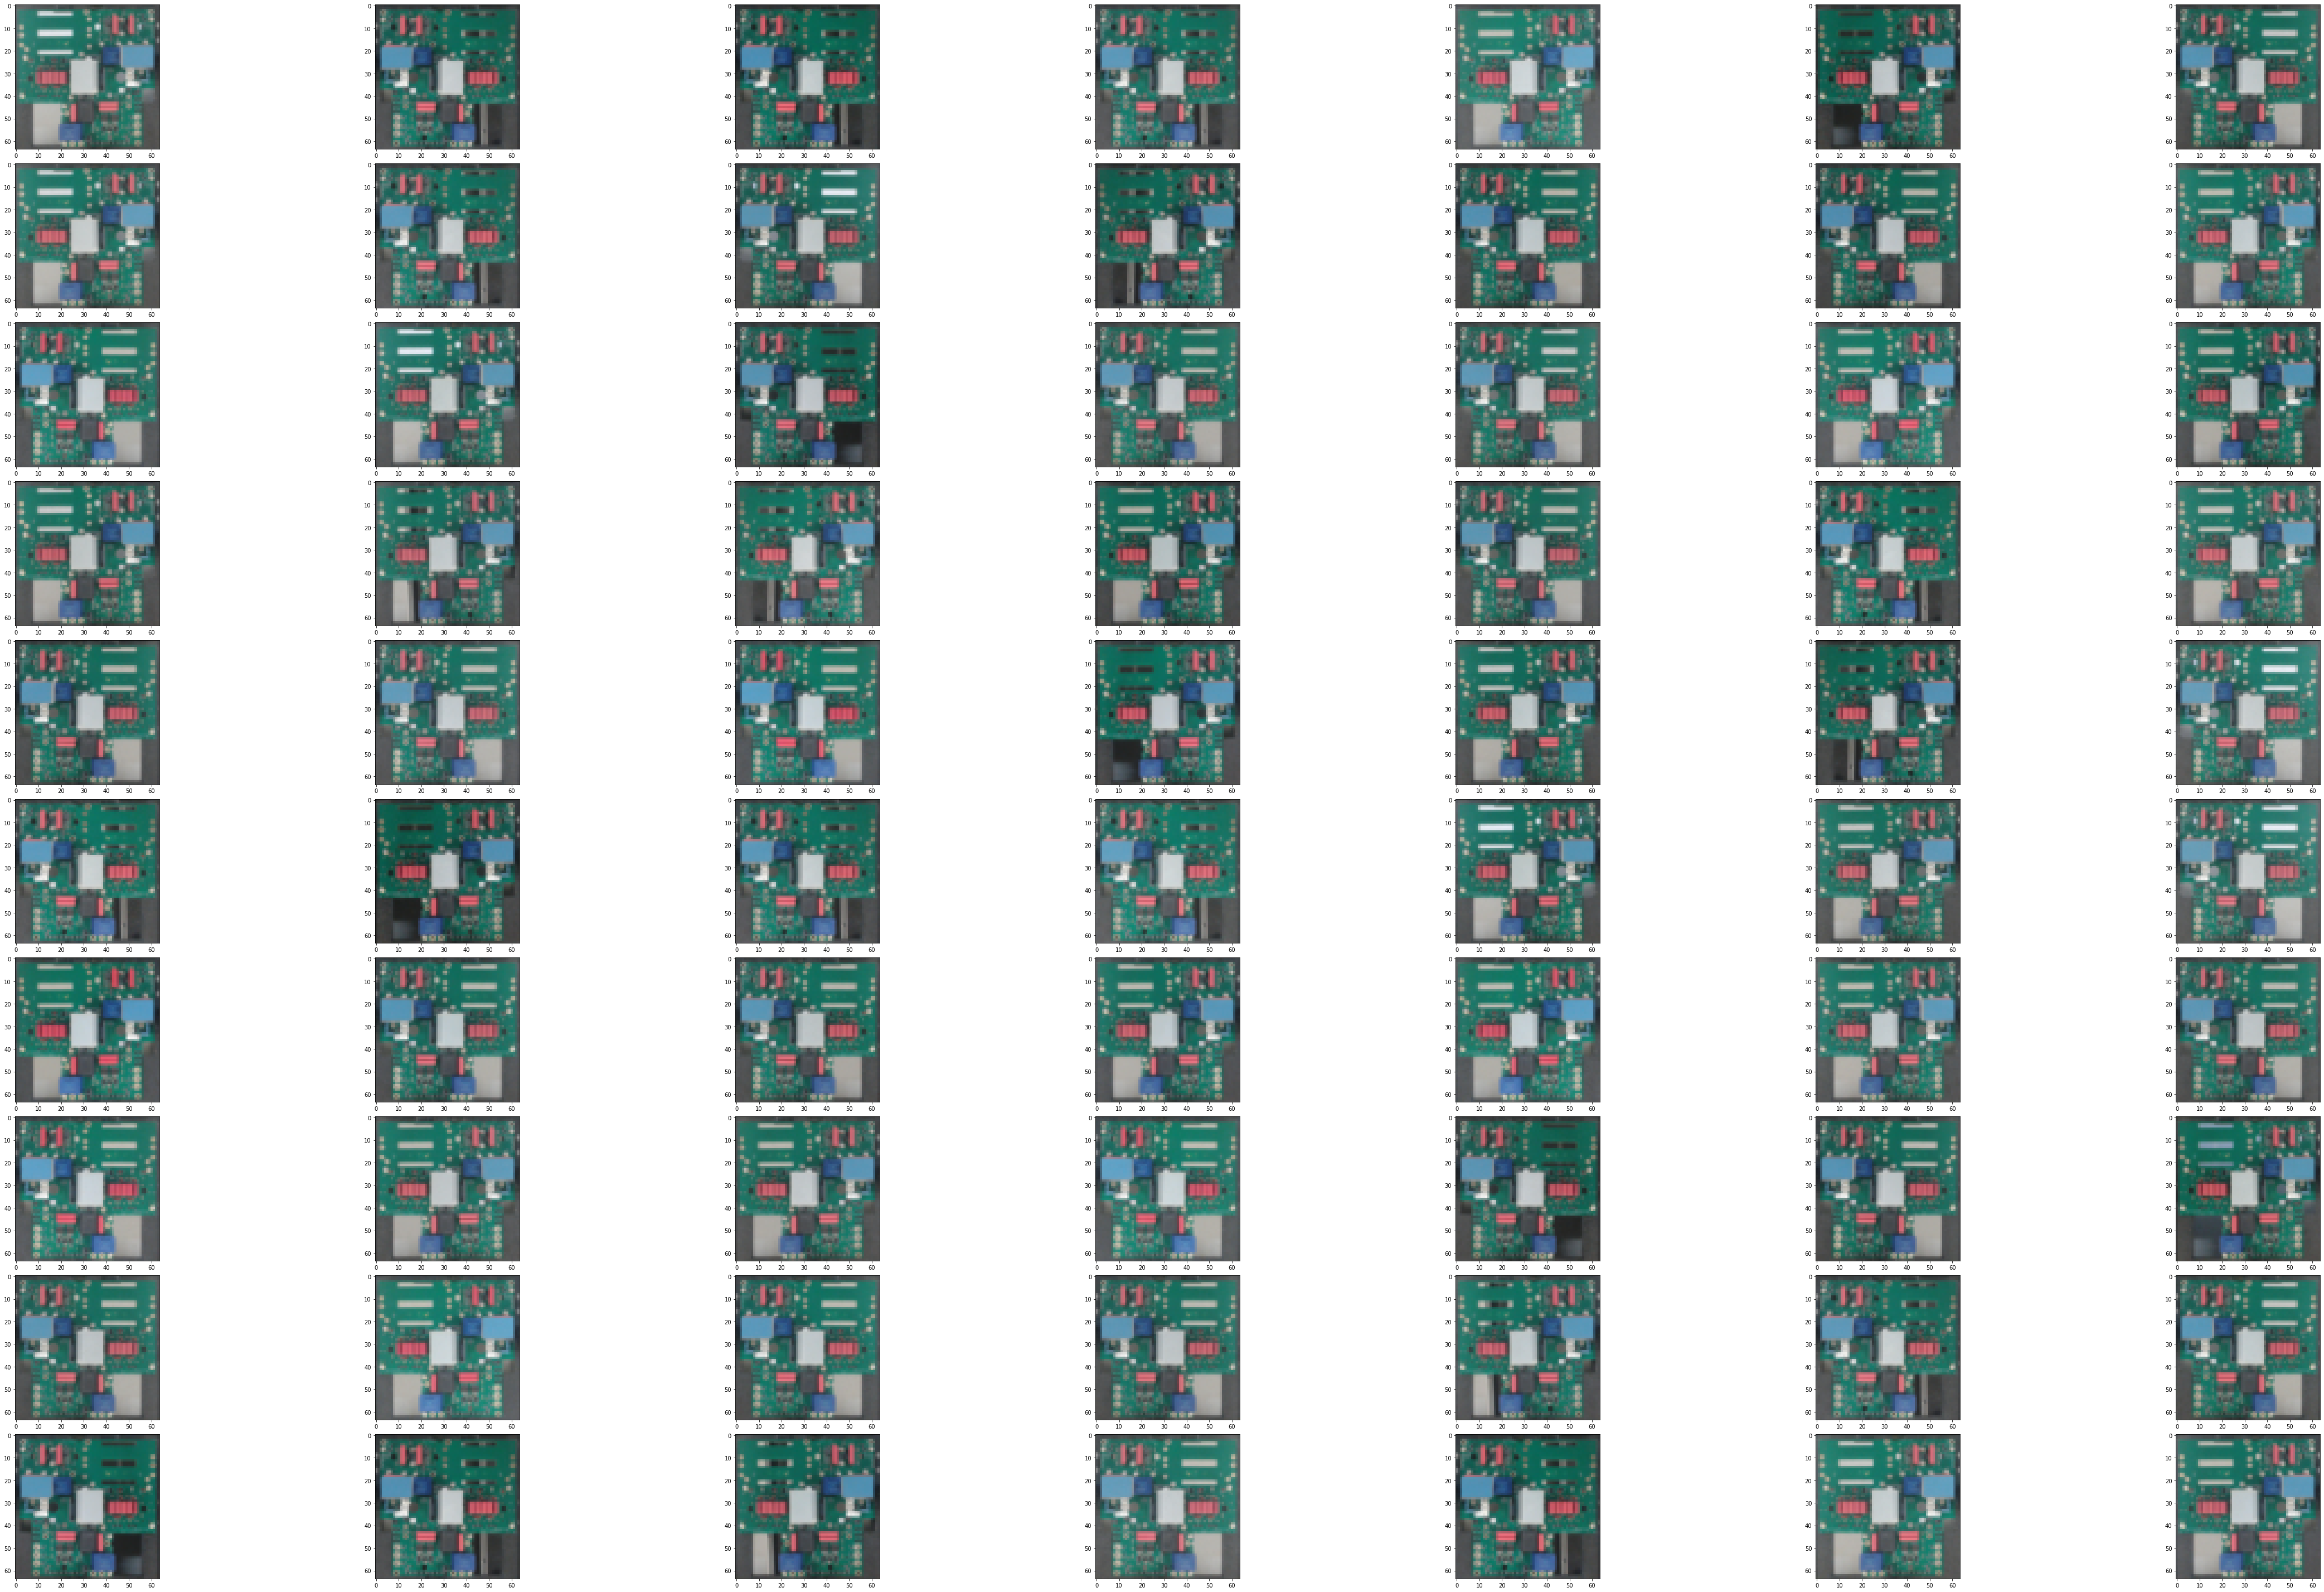

In [15]:
import math
from collections import Counter
for i in range(nr_of_sections):
  
  train_data = agumentData(train_data_paths[i],1) # mode 2 = agumented data
  
  grid_display_x = 10
  grid_display_y = math.ceil(len(train_data.dataset) / 10)

  print("\n Images display grid: ",[grid_display_x,grid_display_y],"\n")
  print("SECTION [",str(i+1),"/",nr_of_sections,"] \n")
  imshow(train_data,grid_display_x,grid_display_y)

In [16]:
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import os


from torchvision import datasets, transforms


def main(opt,data_path,section):
    if type(opt.seed) is int:
        torch.manual_seed(opt.seed)
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    train_data = agumentData(data_path)
        
    
    

    generator = Generator(opt)
    discriminator = Discriminator(opt)

    train_wgangp(opt, generator, discriminator, train_data, device,section)



In [17]:
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import os


from torchvision import datasets, transforms

#imshow(train_data,4,8)

def main(opt,data_path,section):
    if type(opt.seed) is int:
        torch.manual_seed(opt.seed)
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    transform = transforms.Compose([transforms.Resize([opt.img_size]*2),
                                    transforms.RandomHorizontalFlip(),
                                    transforms.ToTensor(),
                                    transforms.Normalize([0.5, 0.5, 0.5],
                                                         [0.5, 0.5, 0.5])])

    

    train_dataset = datasets.ImageFolder(data_path, transform=transform)
    train_data = torch.utils.data.DataLoader(train_dataset,32,True)
    #print(os.listdir("./GAN_typeC_right/train/good"))
    
    

    
    

    generator = Generator(opt)
    discriminator = Discriminator(opt)

    train_wgangp(opt, generator, discriminator, train_data, device, section=section)



Trening modeli pod sekcję:

In [18]:
for i in range(nr_of_sections):
  print("\n BEGGINING WGAN LEARNING FOR SECTION [",str(i+1),"/",nr_of_sections,"] \n")
  main(opt,train_data_paths[i],str(i+1))



 BEGGINING WGAN LEARNING FOR SECTION [ 1 / 1 ] 

[Section 1 ][Epoch    0/1500] [Batch 0/3] [D loss: 9.388708] [G loss: 0.001020]
[Section 1 ][Epoch    1/1500] [Batch 0/3] [D loss: 9.317027] [G loss: 0.000785]
[Section 1 ][Epoch    2/1500] [Batch 0/3] [D loss: 9.206886] [G loss: 0.001517]
[Section 1 ][Epoch    3/1500] [Batch 0/3] [D loss: 9.013716] [G loss: 0.000191]
[Section 1 ][Epoch    4/1500] [Batch 0/3] [D loss: 8.854120] [G loss: -0.000895]
[Section 1 ][Epoch    5/1500] [Batch 0/3] [D loss: 8.573562] [G loss: -0.001790]
[Section 1 ][Epoch    6/1500] [Batch 0/3] [D loss: 8.291016] [G loss: -0.006901]
[Section 1 ][Epoch    7/1500] [Batch 0/3] [D loss: 7.772451] [G loss: -0.008929]
[Section 1 ][Epoch    8/1500] [Batch 0/3] [D loss: 7.240526] [G loss: -0.011286]
[Section 1 ][Epoch    9/1500] [Batch 0/3] [D loss: 6.425414] [G loss: -0.025758]
[Section 1 ][Epoch   10/1500] [Batch 0/3] [D loss: 5.501946] [G loss: -0.043732]
[Section 1 ][Epoch   11/1500] [Batch 0/3] [D loss: 4.369140] [G

The fake images are saved under `f-AnoGAN/mvtec_ad/results/images`.

**^^ Po powyższych krokach setup potrafi generować 'fake images'**

### 4. DEEP ENCODER

Teraz czas na encoder. Jego zadaniem jest mapowanie zdjęć z powrotem do przestrzeniu ukrytej (latent space) GAN'a.
Ten tutaj działa w oparciu o architekturę *izif*: image-latent-image feature loss

- The mapping is based on a trained encoder, and anomalies are detected via a combined anomaly score based on the building blocks of the trained model - comprising a discriminator feature residual error and an image reconstruction error

- Encoder enables A fast learned mapping technique of new data to the GAN's latent space

In [19]:
import os
import torch
import torch.nn as nn
from torchvision.utils import save_image



def train_encoder_izif(opt, generator, discriminator, encoder,
                       dataloader, device, kappa=1.0,section="none"):
    generator.load_state_dict(torch.load(f"results/{section}/generator"))
    discriminator.load_state_dict(torch.load(f"results/{section}/discriminator"))

    generator.to(device).eval()
    discriminator.to(device).eval()
    encoder.to(device)

    criterion = nn.MSELoss()

    optimizer_E = torch.optim.Adam(encoder.parameters(),
                                   lr=opt.lr, betas=(opt.b1, opt.b2))

    os.makedirs(f"results/{section}/images_e", exist_ok=True)

    padding_epoch = len(str(opt.n_epochs))
    padding_i = len(str(len(dataloader)))

    batches_done = 0
    for epoch in range(opt.n_epochs):
        for i, (imgs, _) in enumerate(dataloader):

            # Configure input
            real_imgs = imgs.to(device)

            # ----------------
            #  Train Encoder
            # ----------------

            optimizer_E.zero_grad()

            # Generate a batch of latent variables
            z = encoder(real_imgs)

            # Generate a batch of images
            fake_imgs = generator(z)

            # Real features
            real_features = discriminator.forward_features(real_imgs)
            # Fake features
            fake_features = discriminator.forward_features(fake_imgs)

            # izif architecture
            loss_imgs = criterion(fake_imgs, real_imgs)
            loss_features = criterion(fake_features, real_features)
            e_loss = loss_imgs + kappa * loss_features

            e_loss.backward()
            optimizer_E.step()

            # Output training log every n_critic steps
            if i % opt.n_critic == 0:
                print(f"[Section {section} ]"
                      f"[Epoch {epoch:{padding_epoch}}/{opt.n_epochs}] "
                      f"[Batch {i:{padding_i}}/{len(dataloader)}] "
                      f"[E loss: {e_loss.item():3f}]")

                if batches_done % opt.sample_interval == 0:
                    fake_z = encoder(fake_imgs)
                    reconfiguration_imgs = generator(fake_z)
                    save_image(reconfiguration_imgs.data[:25],
                               f"results/{section}/images_e/{batches_done:06}.png",
                               nrow=5, normalize=True)

                batches_done += opt.n_critic
    torch.save(encoder.state_dict(), f"results/{section}/encoder")


In [20]:
opt = Namespace(b1=0.5,
                b2=0.999,
                batch_size=32,
                channels=3,
                dataset_name='bottle',
                force_download=False,
                img_size=64,
                latent_dim=100,
                lr=0.0002,
                n_critic=5,
                n_epochs=200,
                #n_epochs=2, #debug
                sample_interval=50,
                seed=1)

In [21]:
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as transforms




def main(opt,data_path,section):
    if type(opt.seed) is int:
        torch.manual_seed(opt.seed)
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    transform = transforms.Compose([transforms.Resize([opt.img_size]*2),
                                    transforms.RandomHorizontalFlip(),
                                    transforms.ToTensor(),
                                    transforms.Normalize([0.5, 0.5, 0.5],
                                                         [0.5, 0.5, 0.5])])
    
    train_dataset = datasets.ImageFolder(data_path, transform=transform)
    train_data = torch.utils.data.DataLoader(train_dataset,32,True)

    generator = Generator(opt)
    discriminator = Discriminator(opt)
    encoder = Encoder(opt)

    train_encoder_izif(opt, generator, discriminator, encoder,
                       train_data, device,section=section)


    


In [22]:
for i in range(nr_of_sections):
  print("\n BEGGINING DEEP-ENCODER LEARNING FOR SECTION [",str(i+1),"/",nr_of_sections,"] \n")
  main(opt,train_data_paths[i],str(i+1))


#main(opt,train_data_path_1,"1")
#main(opt,train_data_path_2,"2")


 BEGGINING DEEP-ENCODER LEARNING FOR SECTION [ 1 / 1 ] 

[Section 1 ][Epoch   0/200] [Batch 0/3] [E loss: 0.437734]
[Section 1 ][Epoch   1/200] [Batch 0/3] [E loss: 0.403881]
[Section 1 ][Epoch   2/200] [Batch 0/3] [E loss: 0.357932]
[Section 1 ][Epoch   3/200] [Batch 0/3] [E loss: 0.287588]
[Section 1 ][Epoch   4/200] [Batch 0/3] [E loss: 0.250357]
[Section 1 ][Epoch   5/200] [Batch 0/3] [E loss: 0.207215]
[Section 1 ][Epoch   6/200] [Batch 0/3] [E loss: 0.187096]
[Section 1 ][Epoch   7/200] [Batch 0/3] [E loss: 0.166468]
[Section 1 ][Epoch   8/200] [Batch 0/3] [E loss: 0.163786]
[Section 1 ][Epoch   9/200] [Batch 0/3] [E loss: 0.160134]
[Section 1 ][Epoch  10/200] [Batch 0/3] [E loss: 0.148345]
[Section 1 ][Epoch  11/200] [Batch 0/3] [E loss: 0.154165]
[Section 1 ][Epoch  12/200] [Batch 0/3] [E loss: 0.148768]
[Section 1 ][Epoch  13/200] [Batch 0/3] [E loss: 0.139323]
[Section 1 ][Epoch  14/200] [Batch 0/3] [E loss: 0.132342]
[Section 1 ][Epoch  15/200] [Batch 0/3] [E loss: 0.146382

The reconfigured images are saved under `f-AnoGAN/mvtec_ad/results/images_e`.

### 5. Złożenie f-AnoGAN'a (WGAN + deep enkoder)

Tutaj już część detekcji anomali: połączenie GANA (generator, dyskryminator) z encoderem. I detekcja anomalii.

In [23]:
opt = Namespace(channels=3,
                dataset_name='bottle',
                force_download=False,
                img_size=64,
                latent_dim=100,
                )

In [24]:
import torch
import torch.nn as nn
from torch.utils.model_zoo import tqdm


def test_anomaly_detection(opt, generator, discriminator, encoder,
                           dataloader, device, kappa=1.0,section="none"):
    generator.load_state_dict(torch.load(f"results/{section}/generator"))
    discriminator.load_state_dict(torch.load(f"results/{section}/discriminator"))
    encoder.load_state_dict(torch.load(f"results/{section}/encoder"))

    generator.to(device).eval()
    discriminator.to(device).eval()
    encoder.to(device).eval()

    criterion = nn.MSELoss()

    with open(f"results/{section}/score.csv", "w") as f:
        f.write("label,img_distance,anomaly_score,z_distance\n")

    for (img, label) in tqdm(dataloader):

        real_img = img.to(device)

        real_z = encoder(real_img)
        fake_img = generator(real_z)
        fake_z = encoder(fake_img)

        real_feature = discriminator.forward_features(real_img)
        fake_feature = discriminator.forward_features(fake_img)

        # Scores for anomaly detection
        img_distance = criterion(fake_img, real_img)
        loss_feature = criterion(fake_feature, real_feature)
        anomaly_score = img_distance + kappa * loss_feature

        z_distance = criterion(fake_z, real_z)

        with open(f"results/{section}/score.csv", "a") as f:
            f.write(f"{label.item()},{img_distance},"
                    f"{anomaly_score},{z_distance}\n")


In [25]:
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as transforms




def main(opt,data_path,section):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    transform = transforms.Compose([transforms.Resize([opt.img_size]*2),
                                    transforms.RandomHorizontalFlip(),
                                    transforms.ToTensor(),
                                    transforms.Normalize([0.5, 0.5, 0.5],
                                                         [0.5, 0.5, 0.5])])
    test_dataset = datasets.ImageFolder(data_path, transform=transform)
    test_data = torch.utils.data.DataLoader(test_dataset,1,False)


    generator = Generator(opt)
    discriminator = Discriminator(opt)
    encoder = Encoder(opt)

    test_anomaly_detection(opt, generator, discriminator, encoder,
                           test_data, device,section=section)


    


In [26]:
for i in range(nr_of_sections):
  print("\n BEGGINING ANOMALLY DETECTION LEARNING FOR SECTION [",str(i+1),"/",nr_of_sections,"] \n")
  main(opt,test_data_paths[i],str(i+1))



 BEGGINING ANOMALLY DETECTION LEARNING FOR SECTION [ 1 / 1 ] 



  0%|          | 0/327 [00:00<?, ?it/s]

Scores for anomaly detection are saved under `f-AnoGAN/mvtec_ad/results`.

### Step: 4
If you don't run command `save_compared_images.py `yet, please run below after Step: 2.

### 6. Wyniki

In [27]:
opt = Namespace(channels=3,
                dataset_name='bottle',
                force_download=False,
                img_size=64,
                latent_dim=100,
                n_grid_lines=10,
                n_iters=0)

In [28]:
import os
import torch
from torchvision.utils import save_image


def save_compared_images(opt, generator, encoder, dataloader, device,section):
    generator.load_state_dict(torch.load(f"results/{section}/generator"))
    encoder.load_state_dict(torch.load(f"results/{section}/encoder"))

    generator.to(device).eval()
    encoder.to(device).eval()

    os.makedirs(f"results/{section}/images_diff", exist_ok=True)

    for i, (img, label) in enumerate(dataloader):
        real_img = img.to(device)

        real_z = encoder(real_img)
        fake_img = generator(real_z)

        compared_images = torch.empty(real_img.shape[0] * 3,
                                      *real_img.shape[1:])
        compared_images[0::3] = real_img
        compared_images[1::3] = fake_img
        compared_images[2::3] = real_img - fake_img

        save_image(compared_images.data,
                   f"results/{section}/images_diff/{opt.n_grid_lines*(i+1):06}.png",
                   nrow=3, normalize=True)

        if opt.n_iters is not None and opt.n_iters == i:
            break


In [29]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader




def main(opt,data_path,section):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    transform = transforms.Compose([transforms.Resize([opt.img_size]*2),
                                    transforms.RandomHorizontalFlip(),
                                    transforms.ToTensor(),
                                    transforms.Normalize([0.5, 0.5, 0.5],
                                                         [0.5, 0.5, 0.5])])
    
    test_dataset = datasets.ImageFolder(data_path, transform=transform)
    test_data = torch.utils.data.DataLoader(test_dataset,opt.n_grid_lines,False)

    

    generator = Generator(opt)
    encoder = Encoder(opt)

    save_compared_images(opt, generator, encoder, test_data, device,section=section)




In [30]:
for i in range(nr_of_sections):
  print("\n SAVING COMPARED IMAGES (OK & NOK) FOR SECTION [",str(i+1),"/",nr_of_sections,"] \n")
  main(opt,test_data_paths[i],str(i+1))



 SAVING COMPARED IMAGES (OK & NOK) FOR SECTION [ 1 / 1 ] 



Compared images are saved under `f-AnoGAN/mvtec_ad/results/images_diff`.


### Wizualizacja



In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve,  precision_recall_curve, auc

In [32]:
from IPython.display import display 
for i in range(nr_of_sections):
  df = pd.read_csv(f"results/{str(i+1)}/score.csv")
  print(f"SECTION {str(i+1)} RESULTS (in CSV):")
  display(df) 


SECTION 1 RESULTS (in CSV):


label  img_distance  anomaly_score  z_distance
0        0      0.052768       0.177834    0.006618
1        0      0.055398       0.187176    0.012884
2        0      0.052783       0.176193    0.006793
3        0      0.055123       0.198737    0.006474
4        0      0.055431       0.192316    0.012817
..     ...           ...            ...         ...
322      1      0.030258       0.042992    0.001221
323      1      0.030303       0.043028    0.001101
324      1      0.035445       0.051402    0.006936
325      1      0.034274       0.054931    0.014583
326      1      0.035316       0.059389    0.024044

[327 rows x 4 columns]


 :::SECTION [ 1 / 1 ]::: 


 ROC-AUC


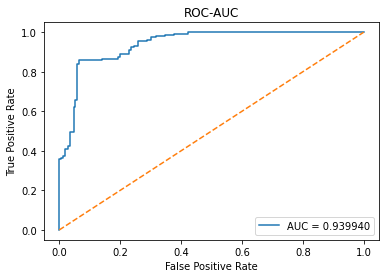


 PR-AUC


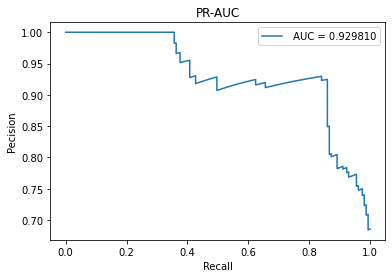

NORMAL VS ABNORMAL DISTRIBUTION


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


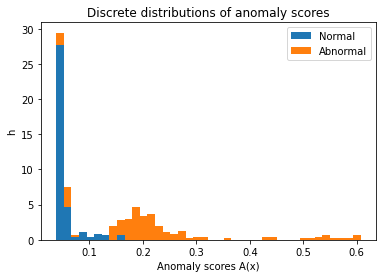

In [33]:
training_label = 1

for i in range(nr_of_sections):
  df = pd.read_csv(f"results/{str(i+1)}/score.csv")
  labels = np.where(df["label"].values == training_label, 0, 1)
  anomaly_score = df["anomaly_score"].values
  img_distance = df["img_distance"].values
  z_distance = df["z_distance"].values

  fpr, tpr, _ = roc_curve(labels, img_distance)
  precision, recall, _ = precision_recall_curve(labels, img_distance)
  roc_auc = auc(fpr, tpr)
  pr_auc =  auc(recall, precision)


  print("\n :::SECTION [",str(i+1),"/",nr_of_sections,"]::: \n")
  print("\n ROC-AUC")
  plt.plot(fpr, tpr, label=f"AUC = {roc_auc:3f}")
  plt.plot([0, 1], [0, 1], linestyle="--")
  plt.title("ROC-AUC")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.legend()
  plt.show()

  print("\n PR-AUC")
  plt.plot(recall, precision, label=f" AUC = {pr_auc:3f}")
  plt.title("PR-AUC")
  plt.xlabel("Recall")
  plt.ylabel("Pecision")
  plt.legend()
  plt.show()

  print("NORMAL VS ABNORMAL DISTRIBUTION")
  plt.hist([anomaly_score[labels == 0], anomaly_score[labels == 1]],
            bins=40, density=True, stacked=True,
            label=["Normal", "Abnormal"])
  plt.title("Discrete distributions of anomaly scores")
  plt.xlabel("Anomaly scores A(x)")
  plt.ylabel("h")
  plt.legend()
  plt.show()


In [ ]:
TP = []
TN = []
FP = []
FN = []

In [ ]:
threshold = 0.025

In [ ]:
for val in anomaly_score[labels == 0]:
  #print(val)
  if val >= threshold:
    FN.append(val)
  else:
    TP.append(val)

for val in anomaly_score[labels == 1]:
  #print(val)
  if val >= threshold:
    TN.append(val)
  else:
    FP.append(val)

TP = len(TP)
TN = len(TN)
FP = len(FP)
FN = len(FN)

In [ ]:
recall = TP/(TP+FP)
print("Recall", recall)
prec = TP/(TP+FN)
print("Precyzja", prec)

ZeroDivisionError: ignored

## Compared Images

SECTION [ 1 / 1 ] IMAGE DIFF


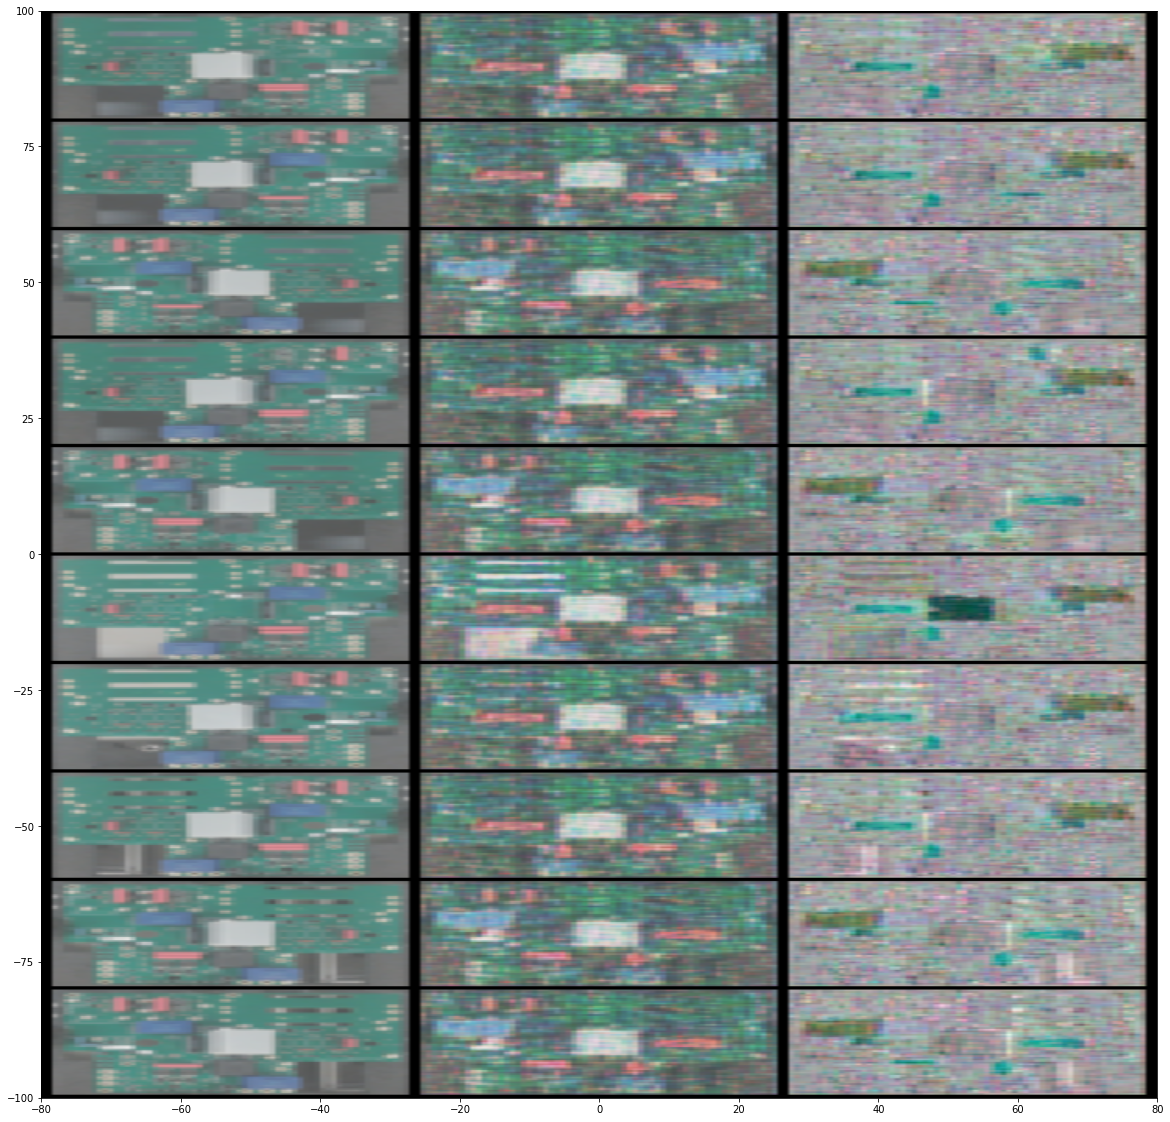

In [36]:
from PIL import Image
import os
import time
for i in range(nr_of_sections):

  print("SECTION [",str(i+1),"/",nr_of_sections,"] IMAGE DIFF")
  im = Image.open(f"results/{str(i+1)}/images_diff/000010.png")
  
  plt.rcParams["figure.figsize"] = [10, 10]
  plt.imshow(im,extent=[-60, 60, -80, 80],aspect="auto")
  plt.show()

Select section to inspect: 1-3 and click ENTER 
1


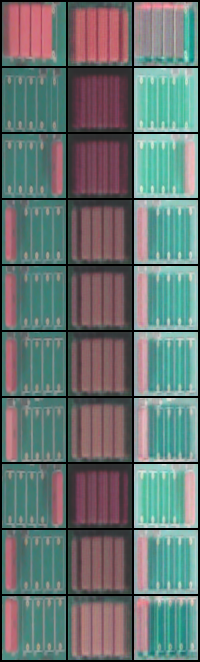

In [ ]:
section_idx = input(f"Select section to inspect: 1-{str(nr_of_sections)} and click ENTER \n")

if(int(section_idx) > nr_of_sections):
  section_idx = input(f"Select section to inspect: 1-{str(nr_of_sections)} and click ENTER \n")
  
k = section_idx
Image.open(f"results/{k}/images_diff/000010.png")